Exploratory Data Analysis (EDA) of Credit Card Fraud Detection between '2020-06-21' and '2020-12-20'

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Load the dataset

df = pd.read_csv(r"C:\Users\Hp\Documents\jobs\Annie Jobs\Elizabeth Job\Fraud Detection\archive (1)\fraudTest_cleaned.csv")

In [84]:
#Preview DataFrame

print(df.head())

   trans_date trans_time            cc_num  \
0  2020-06-21   12:14:25  2291163933867244   
1  2020-06-21   12:14:33  3573030041201292   
2  2020-06-21   12:14:53  3598215285024754   
3  2020-06-21   12:15:15  3591919803438423   
4  2020-06-21   12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last date_of_birth gender                       street        city  \
0   Elliott    1968-03-19      M            351 Darlene Green    Columbia   
1  Williams    1990-01-17      F             3638 Marsh Union     Altonah   
2     Lopez    1970-10-21      F         9333 V

1. Distribution of Fraudulent and Non-Fraudulent Transactions

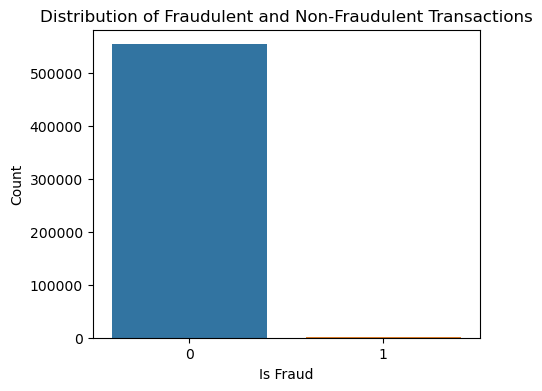

In [85]:
# Plot the distribution of fraudulent and non-fraudulent transactions

plt.figure(figsize=(5, 4))
sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

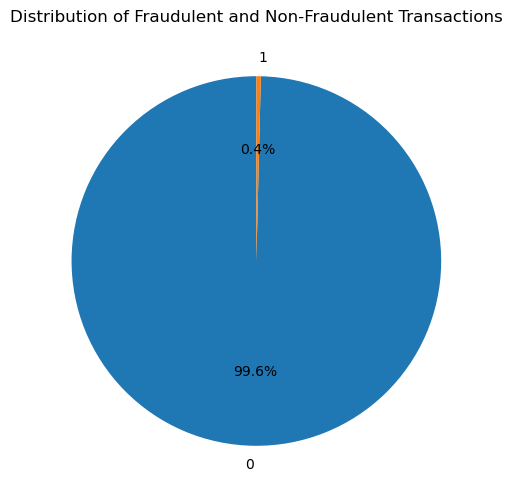

In [86]:
# Create the pie chart

label_map = {0: 'Not Fraud', 1: 'Fraud'}

fraud_counts = df['is_fraud'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

2. Transaction Amount Analysis

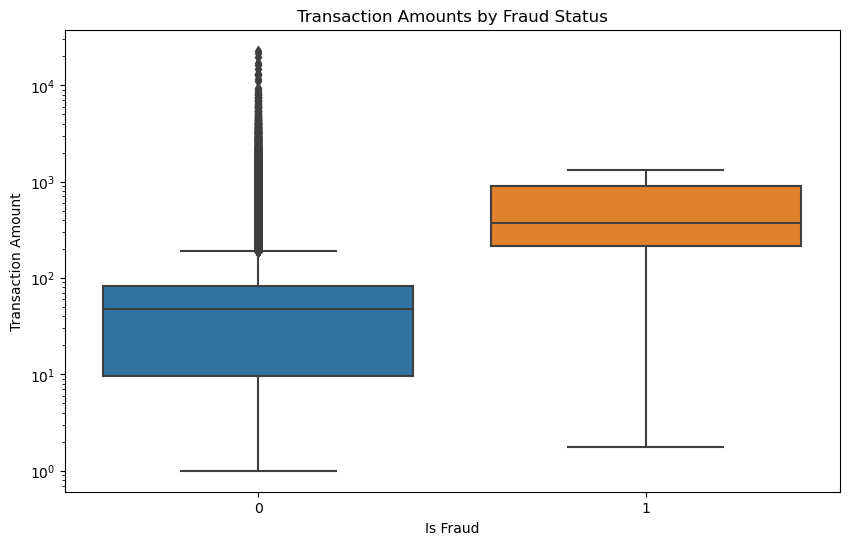

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


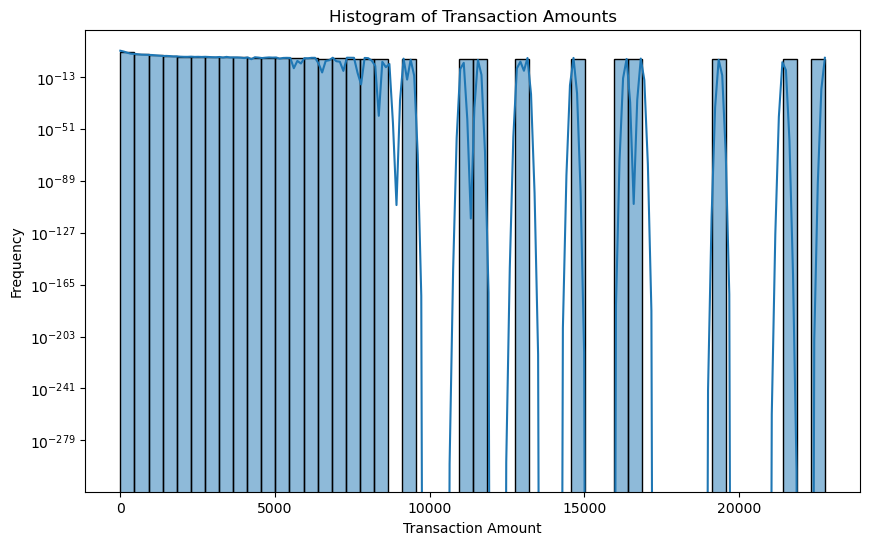

In [87]:
# Boxplot of transaction amounts by fraud status

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  
plt.show()

# Histogram of transaction amounts

plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.yscale('log') 
plt.show()

3. Geographical Analysis

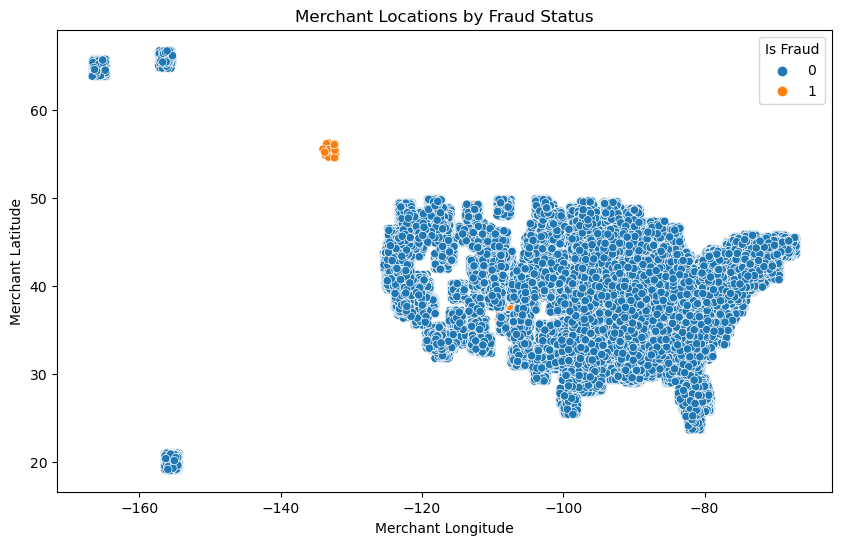

In [88]:
# Scatter plot of merchant locations by fraud status

plt.figure(figsize=(10, 6))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=df)
plt.title('Merchant Locations by Fraud Status')
plt.xlabel('Merchant Longitude')
plt.ylabel('Merchant Latitude')
plt.legend(title='Is Fraud')
plt.show()

4. City Population vs. Transaction Amount

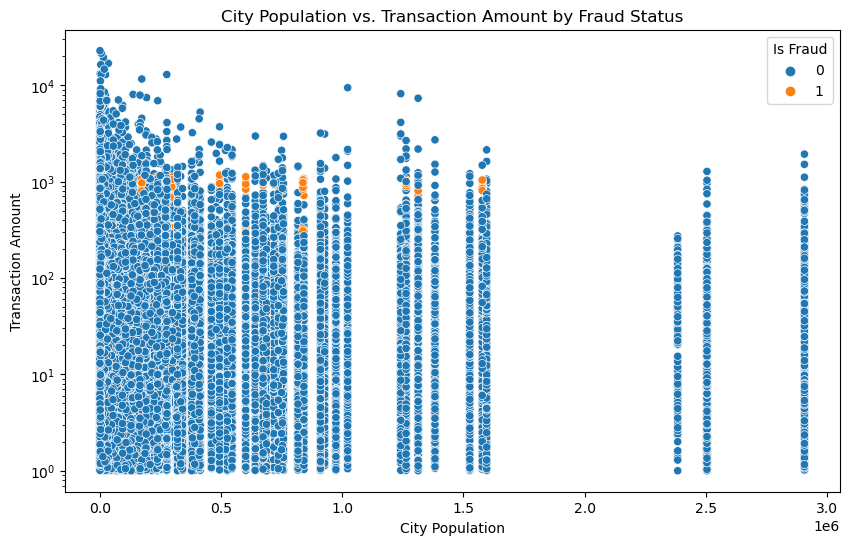

In [89]:
# Scatter plot of city population vs. transaction amount

plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud', data=df)
plt.title('City Population vs. Transaction Amount by Fraud Status')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.yscale('log')  
plt.legend(title='Is Fraud')
plt.show()

5. Age Distribution

C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


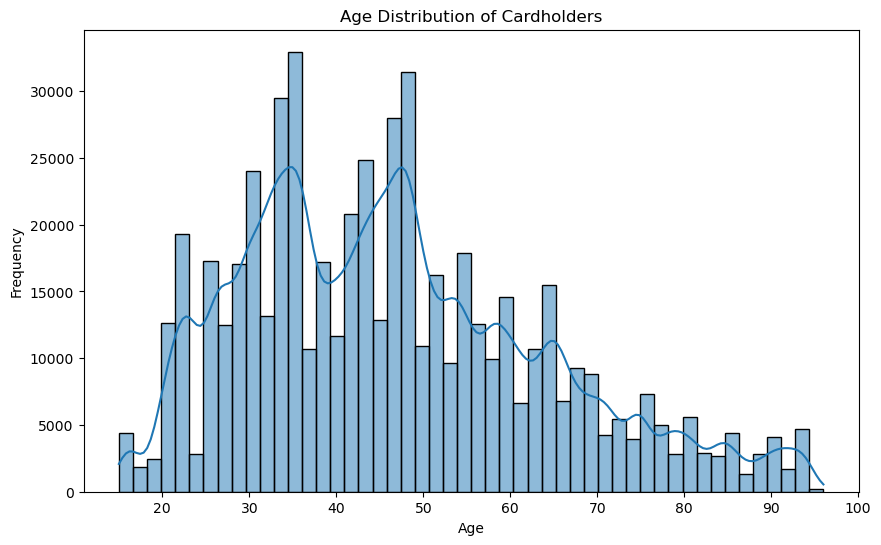

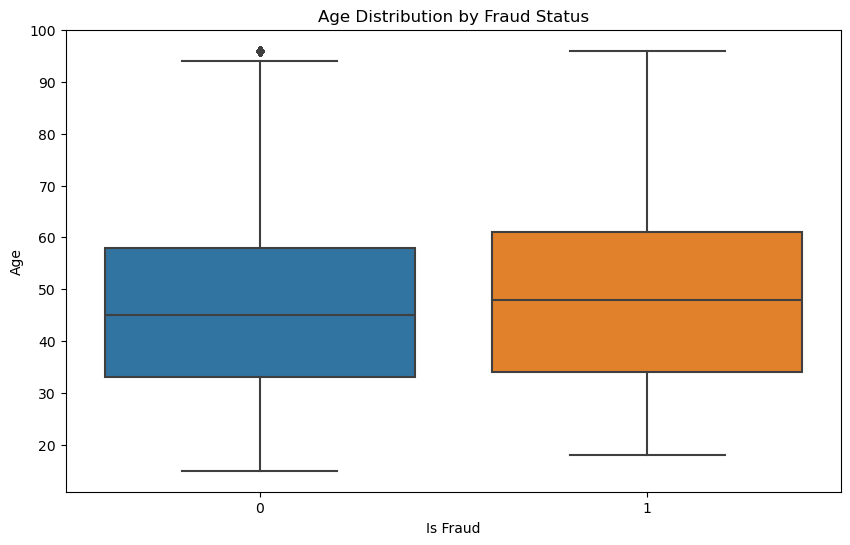

In [90]:
# Convert columns to datetime if not already

df['trans_date'] = pd.to_datetime(df['trans_date'])
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])

# Calculate age from date of birth

df['age'] = df['trans_date'].dt.year - df['date_of_birth'].dt.year

# Histogram of age distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Age Distribution of Cardholders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of age by fraud status

plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='age', data=df)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Age')
plt.show()

7. Gender Distribution

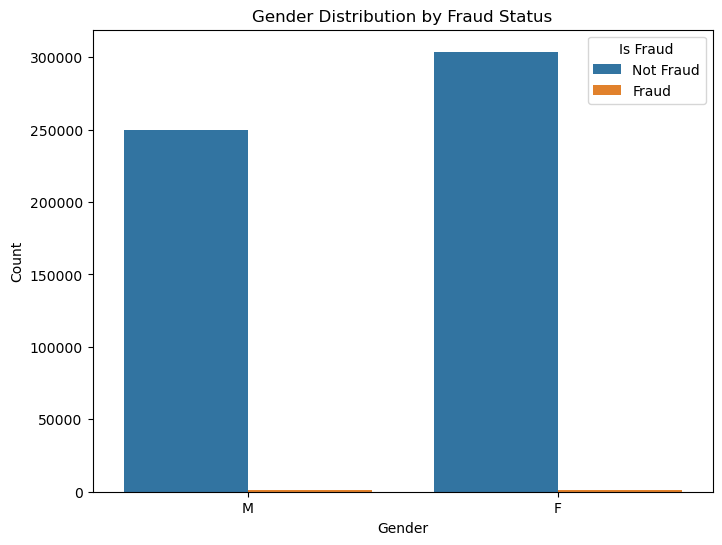

In [93]:
# Count plot of gender distribution by fraud status

df['is_fraud'] = df['is_fraud'].astype(bool)
df['is_fraud'] = df['is_fraud'].map({True: 'Fraud', False: 'Not Fraud'})
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='is_fraud', data=df)
plt.title('Gender Distribution by Fraud Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()



8. Conclusion:

The total percentage of fraudulent transactions in the dataset is approximately 0.4%. This indicates that fraudulent transactions are relatively rare in the given dataset, comprising a small fraction of the overall transaction volume. The visualizations and analyses help in understanding the patterns and characteristics of both fraudulent and non-fraudulent transactions, providing insights that can be crucial for developing effective fraud detection strategies.